# Import all kind of stuff

In [ ]:
# import everything

import sys

import numpy as np
from numpy.typing import NDArray

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

sys.path.append("/Users/oliver/Documents/superconductivity/")

from utilities.constants import k_B_meV, G_0_muS

from utilities.functions import bin_y_over_x, oversample

from thesis.thesislayout import get_figure, theory_layout

from utilities.cpd5 import get_color, get_colors
from utilities.cpd5 import (
    seeblau120,
    seeblau100,
    seeblau80,
    seeblau65,
    seeblau35,
    seeblau20,
)
seeblau = [seeblau120, seeblau100, seeblau65, seeblau35, seeblau20]
from utilities.cpd5 import (
    seegrau120,
    seegrau100,
    seegrau80,
    seegrau65,
    seegrau35,
    seegrau20,
)
seegrau = [seegrau120, seegrau100, seegrau65, seegrau35, seegrau20]

# theory
from models.bcs_np import Delta_meV_of_T
from models.bcs_np import N_of_E, f_of_E
from models.bcs_np import get_I_nA as get_I_nA_bcs
from models.tg import get_I_pat_nA as get_I_nA_tg

from matplotlib_inline.backend_inline import InlineBackend
InlineBackend.print_figure_kwargs = {"bbox_inches": None, "pad_inches": 0.0}
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}
%config InlineBackend.figure_format = "retina"   # or "png"
%config InlineBackend.rc = {"figure.dpi": 300}   # choose a value you like

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [18]:
import superconductivity.api as sc

ModuleNotFoundError: No module named 'superconductivity'

# gap-suppression

In [2]:
def Delta_of_T(T: NDArray[np.float64], T_C: float = 1.0, Delta_0: float = 1.0):
    Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)
    return Delta


T = np.linspace(0, 1, 101)

Delta = Delta_of_T(T)

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_71940/816220097.py:2: RuntimeWarning: divide by zero encountered in divide
  Delta = np.where(T != 0, Delta_0 * np.tanh(1.74 * np.sqrt(T_C / T - 1)), 1.0)


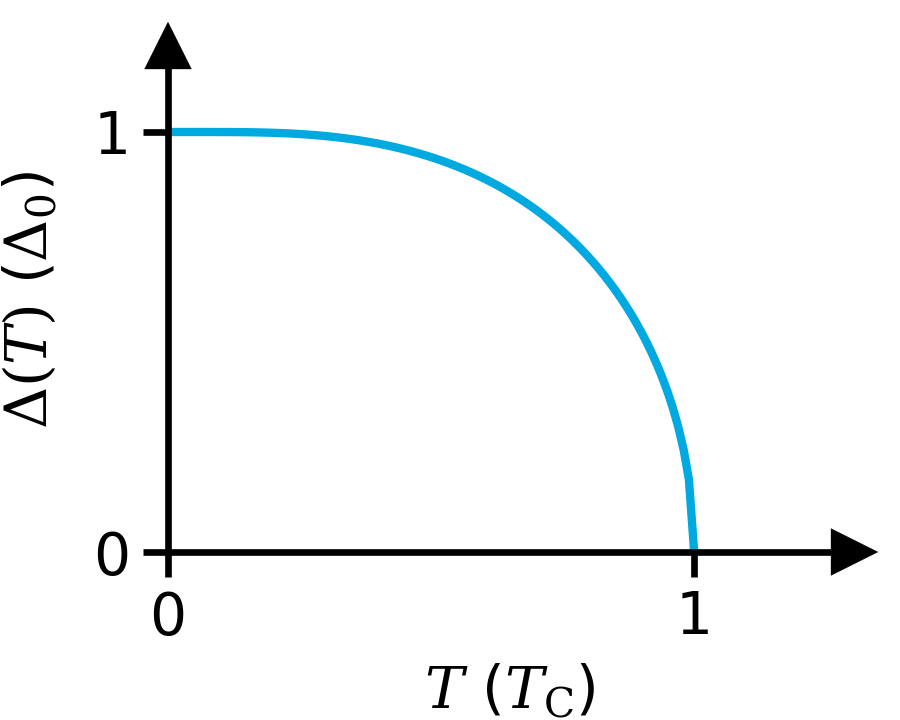

In [3]:
fig, ax = get_figure(figsize=(1.5, 1.2), subfigure=True)

ax.plot(T, Delta, color=seeblau100)

ax.set_xlim(0, 1.3)
ax.set_xticks([0, 1])
ax.set_ylim(0, 1.2)
ax.set_yticks([0, 1])

xlabel = "$T$ ($T_\\mathrm{C}$)"
ylabel = "$\\Delta(T)$ ($\\Delta_0$)"
title = "theory/micro/gap"

theory_layout(fig, ax, title, xlabel, ylabel)

# dos-fermi

In [4]:
Delta_meV = 0.180
E_meV = np.linspace(-2.5 * Delta_meV, 2.5 * Delta_meV, 1001)
gammas_Delta = np.array([0, 1, 2.5, 5]) * 1e-2

Ns = np.full((gammas_Delta.shape[0], E_meV.shape[0]), np.nan)
for i, gamma in enumerate(gammas_Delta):
    Ns[i, :] = N_of_E(
        E_meV=E_meV,
        Delta_meV=Delta_meV,
        gamma_meV=gamma * Delta_meV,
    )

/Users/oliver/Documents/superconductivity/models/bcs.py:148: RuntimeWarning: divide by zero encountered in divide
  dos = np.divide(E_complex_meV, denom)
/Users/oliver/Documents/superconductivity/models/bcs.py:148: RuntimeWarning: invalid value encountered in divide
  dos = np.divide(E_complex_meV, denom)


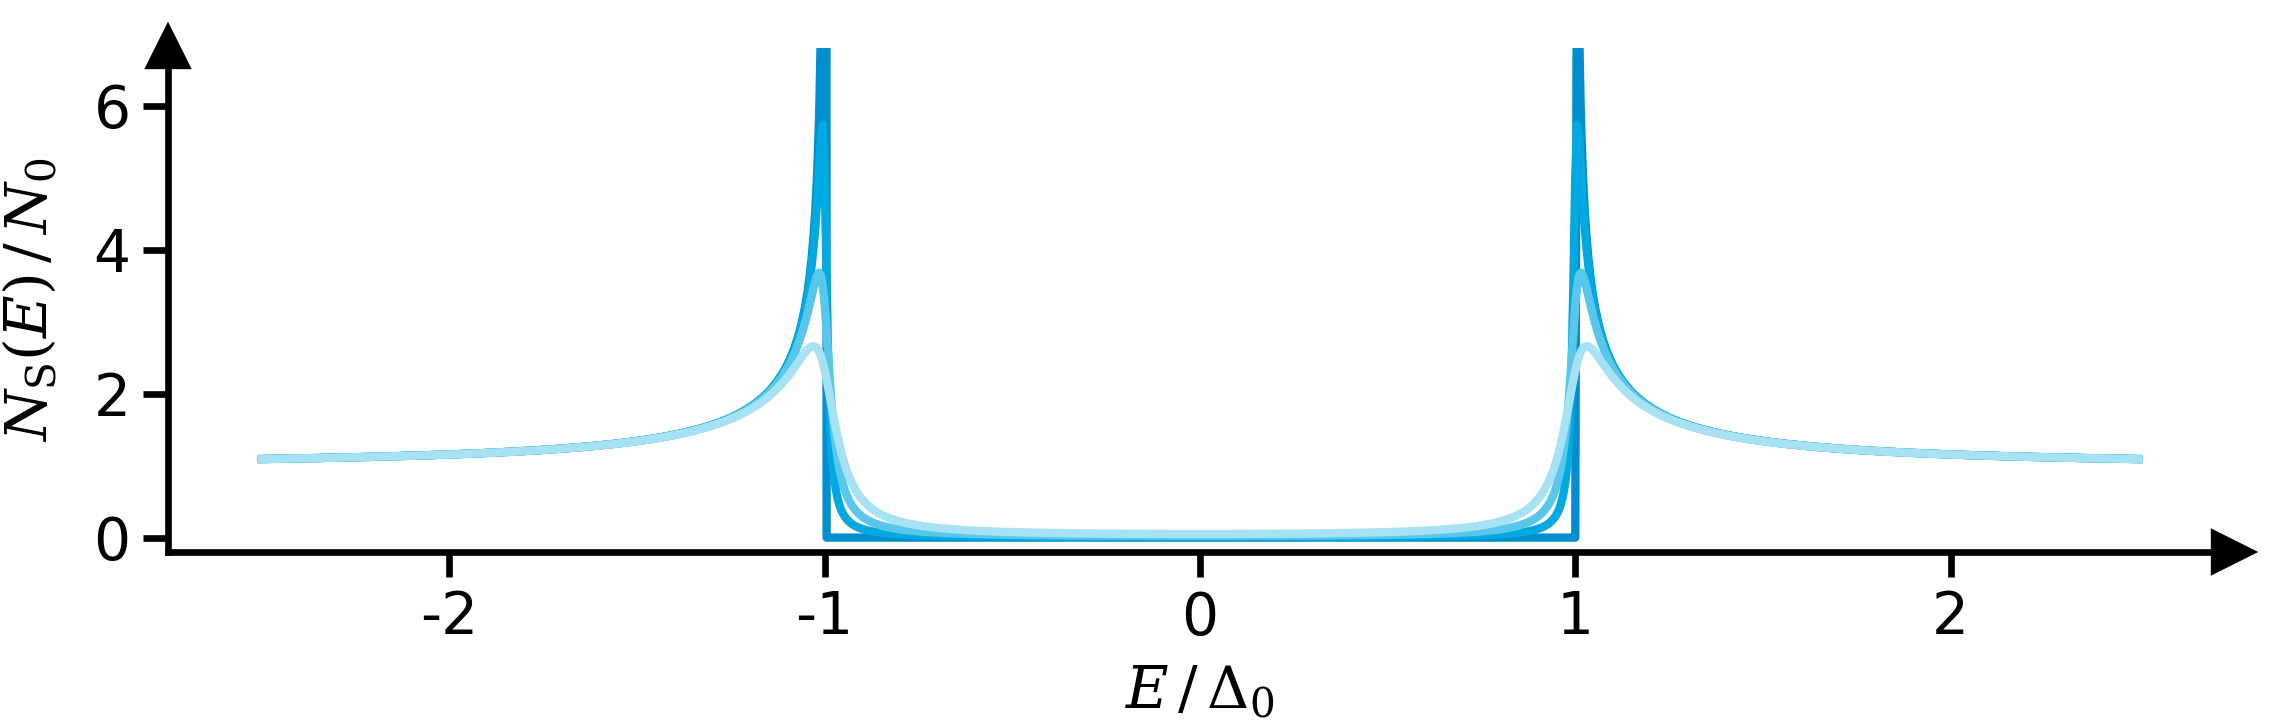

In [5]:
fig, ax = get_figure(figsize=(3.8, 1.2), subfigure=True)

for i, Gamma in enumerate(gammas_Delta):
    ax.plot(
        E_meV / Delta_meV,
        Ns[i, :],
        color=seeblau[i],
        zorder=i,
        label=f"{Gamma*1e2}e-2",
    )

ax.set_ylim(-0.2, 6.8)
ax.set_yticks([0, 2, 4, 6])
ax.set_xticks([-2, -1, 0, 1, 2])

xlabel = "$E\\,/\\,\\Delta_0$"
ylabel = "$N_\\mathrm{S}(E)\\,/\\,N_0$"
title = "theory/micro/dos"

theory_layout(fig, ax, title, xlabel, ylabel)

In [6]:
Delta_meV = 0.180
E_meV = np.linspace(-1.5 * Delta_meV, 1.5 * Delta_meV, 1501)
Ts_TC = np.array([0, 0.3, 0.6, 0.9])
T_C = Delta_meV / (1.764 * k_B_meV)

fs = np.full((Ts_TC.shape[0], E_meV.shape[0]), np.nan)
for i, T in enumerate(Ts_TC):
    fs[i, :] = f_of_E(E_meV=E_meV, T_K=T * T_C)

dfs = -np.gradient(fs, E_meV / Delta_meV, axis=1)
dfs[0, :] = np.zeros_like(E_meV)
dfs[0, 750] = 10

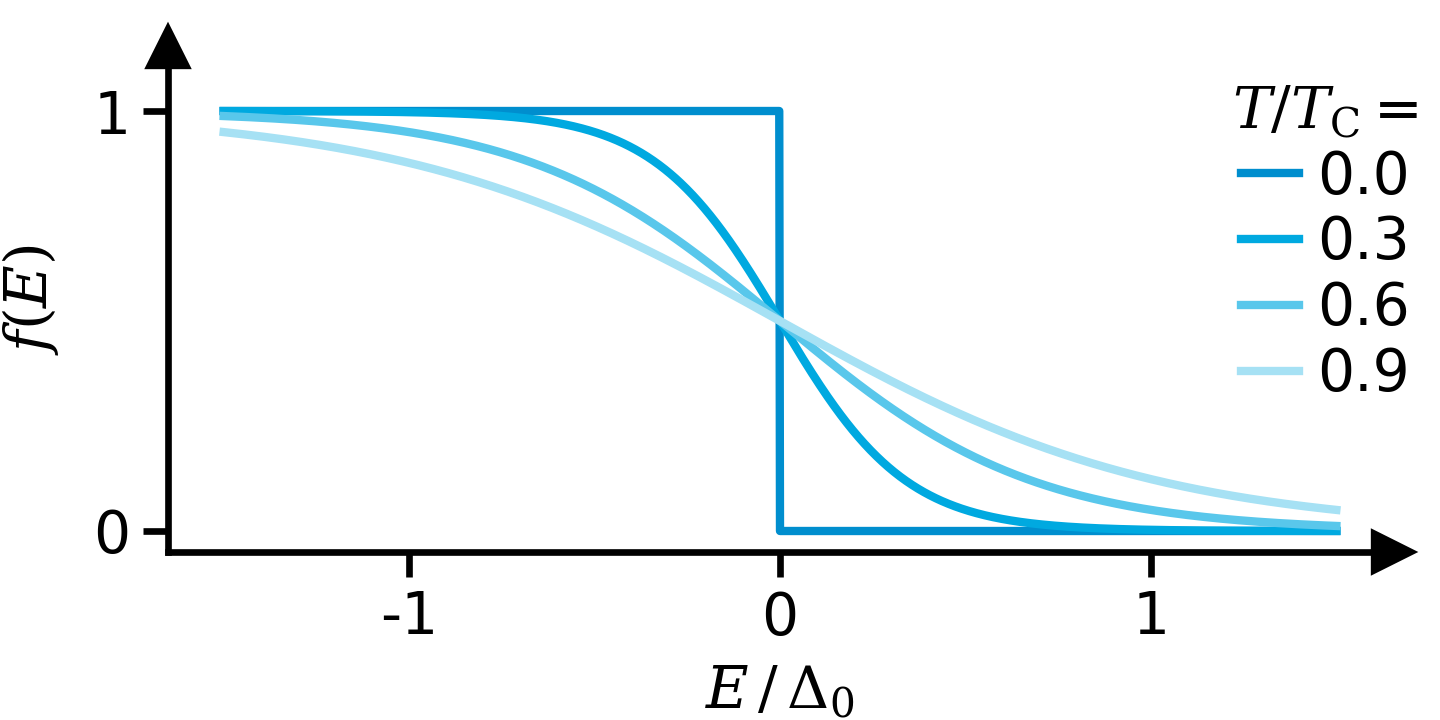

In [7]:
fig, ax = get_figure(figsize=(2.4, 1.2), subfigure=True)

for i, T in enumerate(Ts_TC):
    ax.plot(
        E_meV / Delta_meV,
        fs[i, :],
        zorder=i,
        color=seeblau[i],
        label=f"{T:1.1f}",
    )

ax.legend(
    title=r"$T/T_\mathrm{C} = $",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    bbox_to_anchor=(1.05, 1.0),
    # bbox_to_anchor=(1.0, 1.15),
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.15,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
)


ax.set_ylim(-0.05, 1.15)
ax.set_yticks([0, 1])
ax.set_xticks([-1, 0, 1])

xlabel = "$E\\,/\\,\\Delta_0$"
ylabel = "$f(E)$"
title = "theory/micro/fermi"

theory_layout(fig, ax, title, xlabel, ylabel)

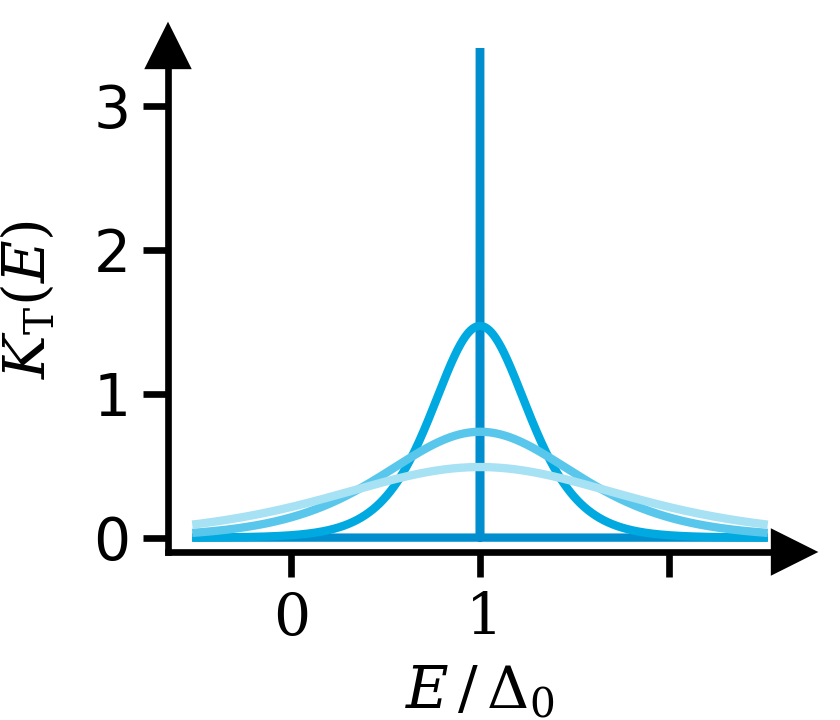

In [8]:
fig, ax = get_figure(figsize=(1.4, 1.2), subfigure=True)

for i, T in enumerate(Ts_TC):
    ax.plot(
        E_meV / Delta_meV,
        dfs[i, :],
        color=seeblau[i],
        zorder=i - 10,
        label=f"{T:1.1f}",
    )

ax.set_ylim(-0.1, 3.4)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([-1, 0, 1], labels=["$0$", "$1$", " "])

xlabel = "$E\\,/\\,\\Delta_0$"
ylabel = "$K_\\mathrm{T}(E)$"
title = "theory/micro/fermi-kernel"

theory_layout(fig, ax, title, xlabel, ylabel)

# tunnel-current

Attention: don't use $G_0$ yet. its not introduced. stick to $G_N$

In [9]:
# generate data
Delta_meV = 0.189
V_mV = np.linspace(0, 2.5 * Delta_meV, 601)  # mV
G_N = 1
T_TC_NS = np.array([0, 0.1, 0.2, 0.4])
# T_TC_SS = np.array([0, 0.1, 0.2, 0.4])
T_TC_SS = np.array([0, 0.4, 0.5, 0.6])
T_C_K = 1.2
gamma_Delta = np.array([0, 1, 2.5, 5.0]) * 1e-2
gamma_Delta = np.array([0, 2.5, 5, 7.5]) * 1e-2

I_NN = G_N * G_0_muS * V_mV  # nA
dIdV_NN = np.gradient(I_NN, V_mV) / G_0_muS

I_NS_T = np.full((T_TC_NS.shape[0], V_mV.shape[0]), np.nan)
I_SS_T = np.full((T_TC_SS.shape[0], V_mV.shape[0]), np.nan)
I_NS_Gamma = np.full((gamma_Delta.shape[0], V_mV.shape[0]), np.nan)
I_SS_Gamma = np.full((gamma_Delta.shape[0], V_mV.shape[0]), np.nan)

for i, T in enumerate(T_TC_NS):
    I_NS_T[i, :] = get_I_nA_bcs(
        V_mV=V_mV,
        G_N=G_N,
        Delta_meV=(0.0, Delta_meV),
        T_K=T * T_C_K,
        gamma_meV=0.0,
    )
for i, T in enumerate(T_TC_SS):
    I_SS_T[i, :] = get_I_nA_bcs(
        V_mV=V_mV,
        G_N=G_N,
        Delta_meV=(Delta_meV, Delta_meV),
        T_K=T * T_C_K,
        gamma_meV=0.0,
    )

for i, gamma in enumerate(gamma_Delta):
    I_NS_Gamma[i, :] = get_I_nA_bcs(
        V_mV=V_mV,
        G_N=G_N,
        Delta_meV=(0.0, Delta_meV),
        T_K=0.0,
        gamma_meV=gamma * Delta_meV,
    )
    I_SS_Gamma[i, :] = get_I_nA_bcs(
        V_mV=V_mV,
        G_N=G_N,
        Delta_meV=(Delta_meV, Delta_meV),
        T_K=0.0,
        gamma_meV=gamma * Delta_meV,
    )

dIdV_NS_T = np.gradient(I_NS_T, V_mV, axis=1) / G_0_muS
dIdV_SS_T = np.gradient(I_SS_T, V_mV, axis=1) / G_0_muS
dIdV_NS_Gamma = np.gradient(I_NS_Gamma, V_mV, axis=1) / G_0_muS
dIdV_SS_Gamma = np.gradient(I_SS_Gamma, V_mV, axis=1) / G_0_muS

I_NS_T /= Delta_meV * G_0_muS
I_SS_T /= Delta_meV * G_0_muS
I_NS_Gamma /= Delta_meV * G_0_muS
I_SS_Gamma /= Delta_meV * G_0_muS

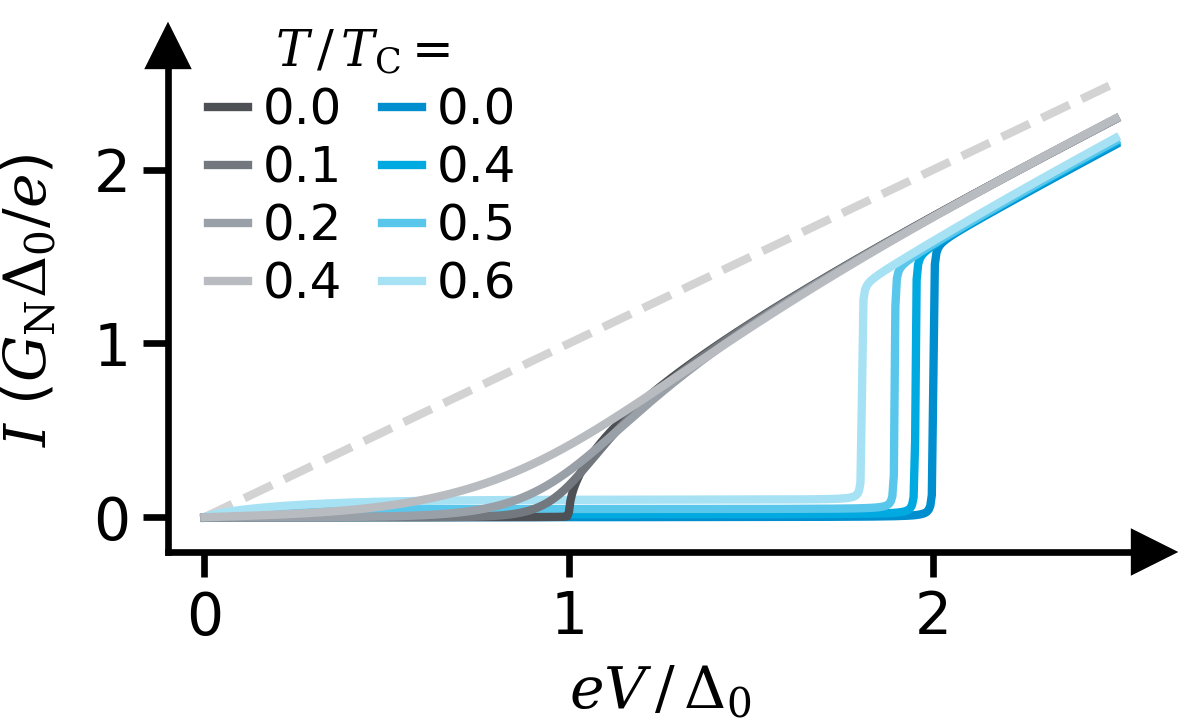

In [10]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

ax.plot(
    V_mV / Delta_meV,
    V_mV / Delta_meV,
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, T in enumerate(T_TC_NS):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        I_NS_T[i, :],
        color=seegrau[i],
        zorder=i + 10,
        label=f"{T:1.1f}",
    )

for i, T in enumerate(T_TC_SS):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_SS_T[i, :],
        color=seeblau[i],
        zorder=i,
        label=f"{T:1.1f}",
    )

ax.legend(
    title="$T\\,/\\,T_\\mathrm{C} = $",
    handlelength=0.8,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=0.8,
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.2,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
    bbox_to_anchor=(0.01, 1.1),
)

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$I$ ($G_\\mathrm{N}\\Delta_0 /e$)"
title = "theory/micro/tunnel-iv-T"

theory_layout(fig, ax, title, xlabel, ylabel)

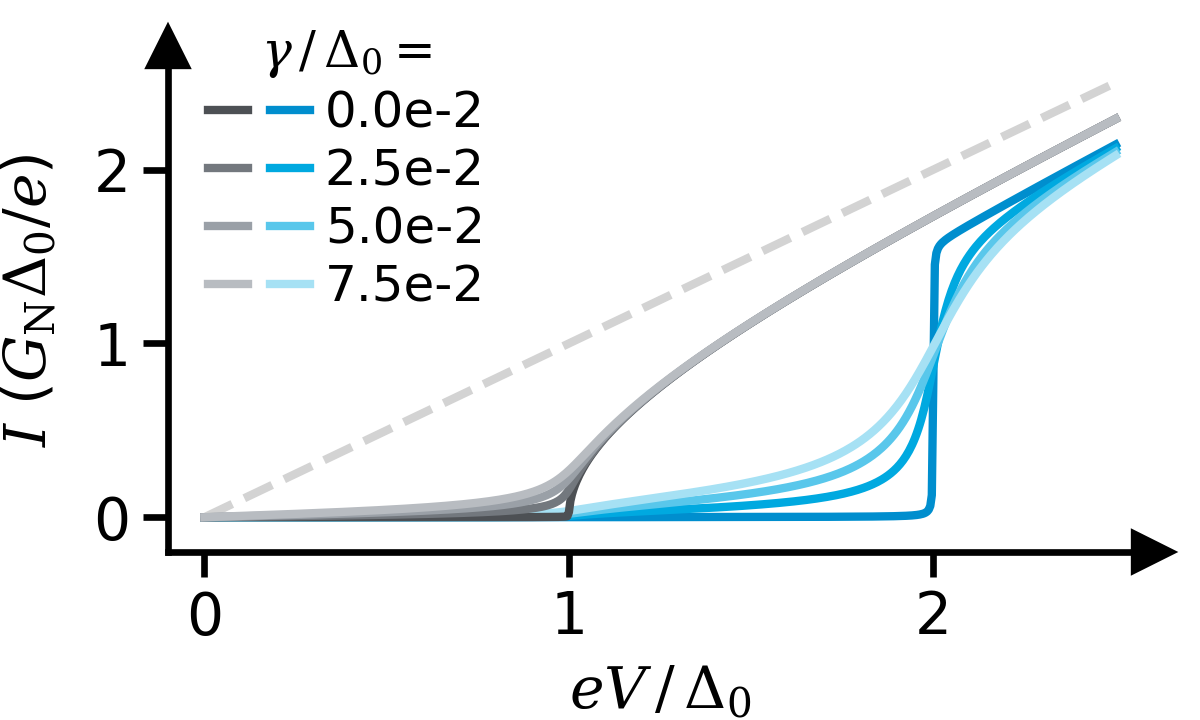

In [11]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

ax.plot(
    V_mV / Delta_meV,
    V_mV / Delta_meV,
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, gamma in enumerate(gamma_Delta):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        I_NS_Gamma[i, :],
        color=seegrau[i],
        zorder=i + 10,
        label="$\\,$",
    )

for i, gamma in enumerate(gamma_Delta):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_SS_Gamma[i, :],
        color=seeblau[i],
        zorder=i,
        label=f"{gamma*1e2:.1f}e-2",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

ax.legend(
    title="$\\gamma\\,/\\,\\Delta_0 = $",
    handlelength=0.8,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=0.1,
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.2,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
    bbox_to_anchor=(0.01, 1.1),
)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$I$ ($G_\\mathrm{N}\\Delta_0 /e$)"
title = "theory/micro/tunnel-iv-gamma"

theory_layout(fig, ax, title, xlabel, ylabel)

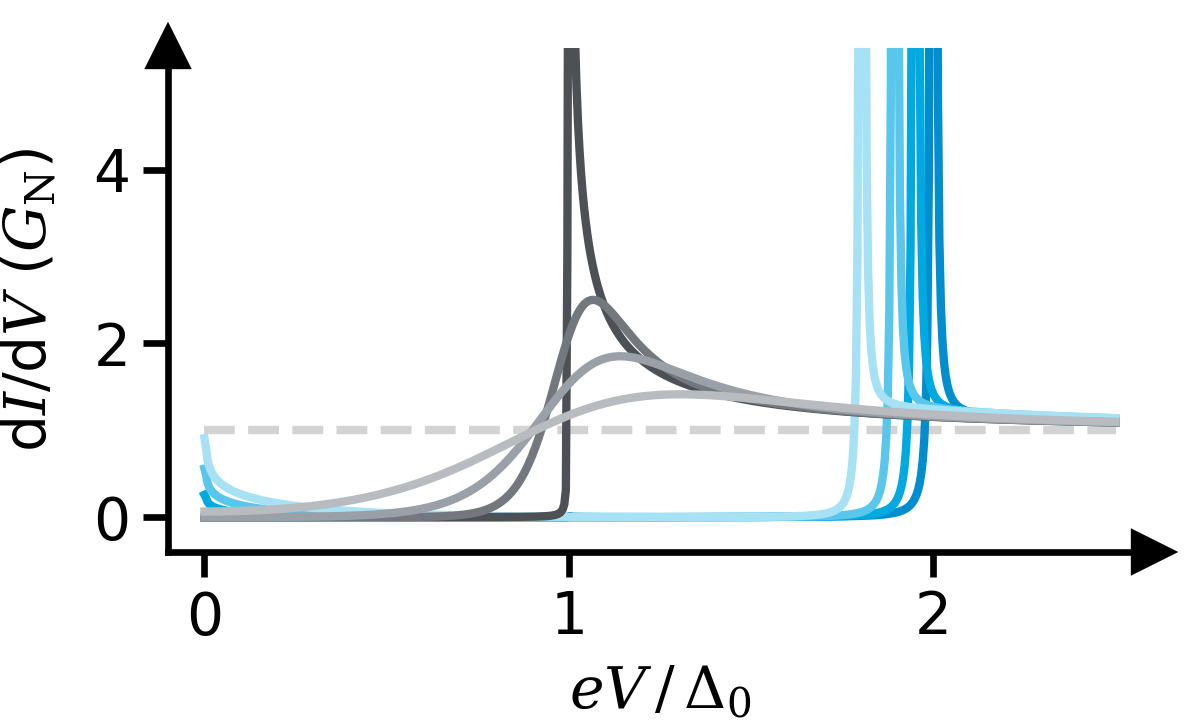

In [12]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

ax.plot(
    V_mV / Delta_meV,
    np.ones_like(V_mV / Delta_meV),
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, T in enumerate(T_TC_NS):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_NS_T[i, :],
        color=seegrau[i],
        zorder=i + 100,
        label=f"{T:1.1f}",
    )

for i, T in enumerate(T_TC_SS):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_SS_T[i, :],
        color=seeblau[i],
        zorder=i + 10,
        label=f"{T:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "d$I/$d$V$ ($G_\\mathrm{N}$)"
title = "theory/micro/tunnel-didv-T"

theory_layout(fig, ax, title, xlabel, ylabel)

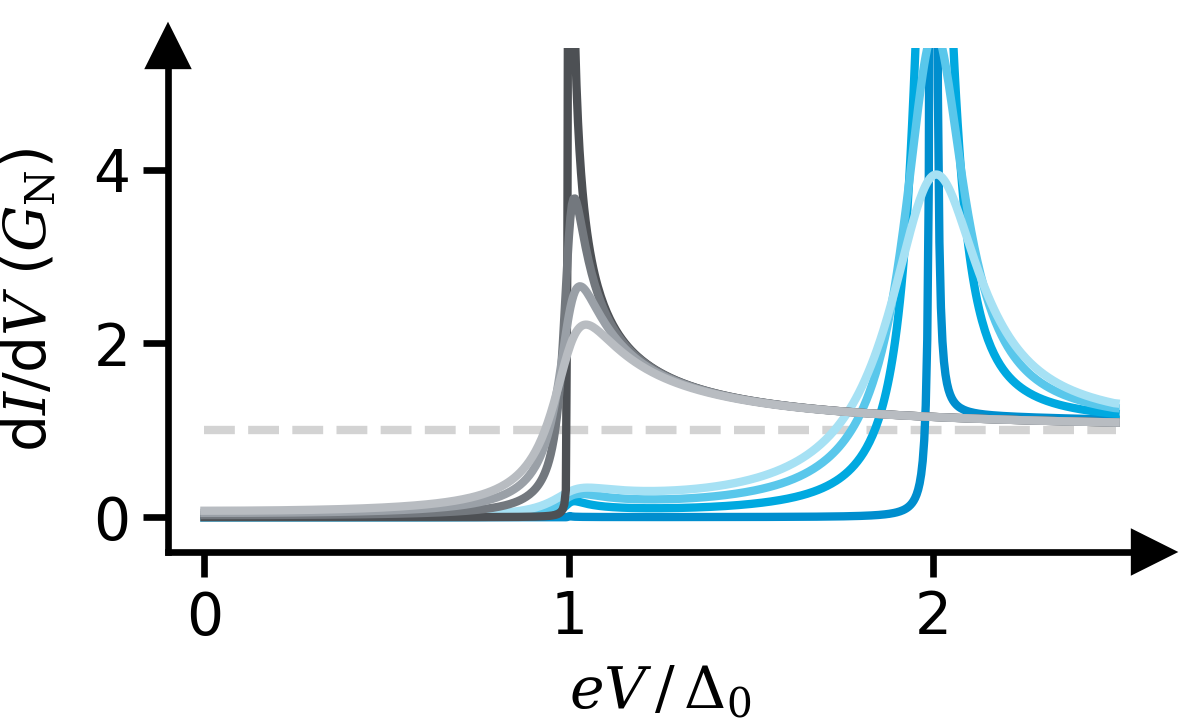

In [13]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

ax.plot(
    V_mV / Delta_meV,
    np.ones_like(V_mV / Delta_meV),
    linestyle="--",
    color="lightgrey",
    zorder=0,
)

for i, gamma in enumerate(gamma_Delta):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_NS_Gamma[i, :],
        color=seegrau[i],
        zorder=i + 10,
        label="$\\,$",
    )

for i, gamma in enumerate(gamma_Delta):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        dIdV_SS_Gamma[i, :],
        color=seeblau[i],
        zorder=i,
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "d$I/$d$V$ ($G_\\mathrm{N}$)"
title = "theory/micro/tunnel-didv-gamma"

theory_layout(fig, ax, title, xlabel, ylabel)

# PAT

In [14]:
# generate data
Delta_meV = 0.180
V_mV = np.linspace(0, 2.5, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.1, 0.2]) * Delta_meV  # mV
A_mV = np.array([0, 0.3, 0.6]) * Delta_meV  # mV

G_N = 1
T_K = 0.0
gamma_meV = 0.0
nu_GHz = 10.0

N_S = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)
I_NS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)
I_SS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)

N_S_0 = N_of_E(E_meV=V_mV, Delta_meV=Delta_meV, gamma_meV=gamma_meV)

I_NS_0 = get_I_nA_bcs(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(0.0, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
)
I_SS_0 = get_I_nA_bcs(
    V_mV=V_mV,
    G_N=G_N,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    gamma_meV=gamma_meV,
)

N_S = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=N_S_0, nu_GHz=nu_GHz)
I_NS = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_NS_0, nu_GHz=nu_GHz)
I_SS = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_SS_0, nu_GHz=nu_GHz)

dIdV_NS = np.gradient(I_NS, V_mV, axis=1) / G_0_muS
dIdV_SS = np.gradient(I_SS, V_mV, axis=1) / G_0_muS

I_NS /= Delta_meV * G_0_muS
I_SS /= Delta_meV * G_0_muS

/Users/oliver/Documents/superconductivity/models/bcs.py:148: RuntimeWarning: divide by zero encountered in divide
  dos = np.divide(E_complex_meV, denom)
/Users/oliver/Documents/superconductivity/models/bcs.py:148: RuntimeWarning: invalid value encountered in divide
  dos = np.divide(E_complex_meV, denom)


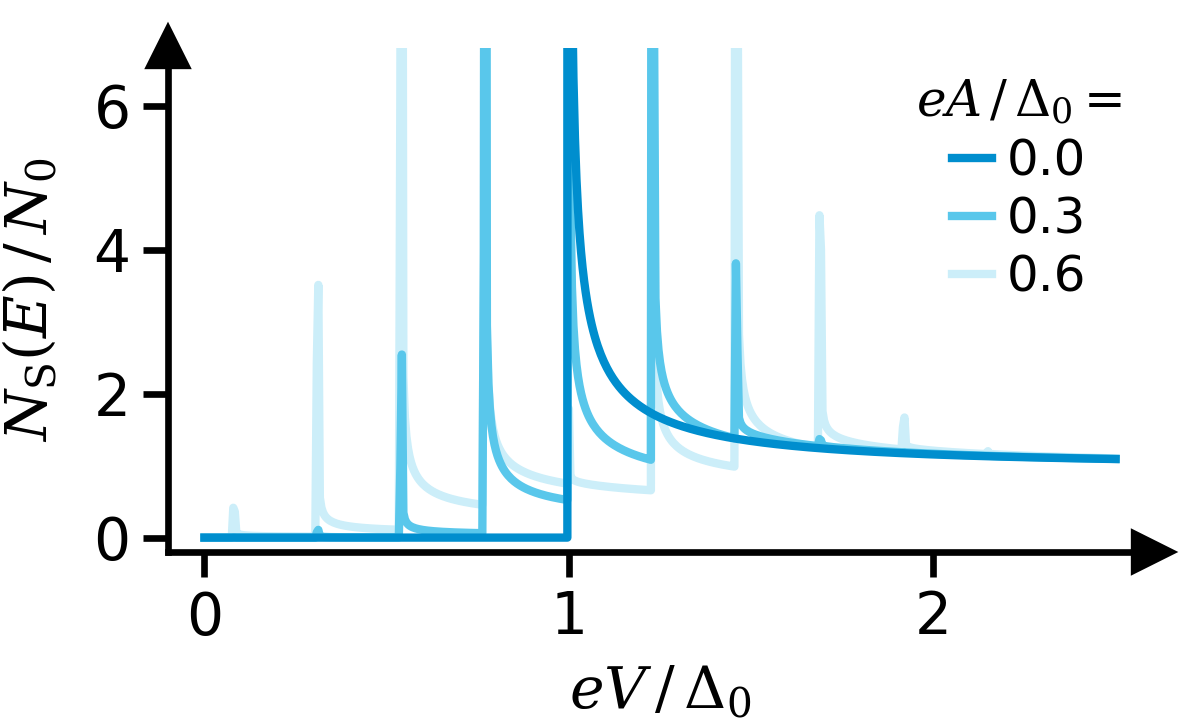

In [15]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

for i, A in enumerate(A_mV):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        N_S[i, :],
        color=seeblau[i * 2],
        zorder=10 - i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.2, 6.8)
ax.set_yticks([0, 2, 4, 6])

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=0.8,
    loc="upper right",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=1,
    columnspacing=0.1,
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.2,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
    # bbox_to_anchor=(0.01, 1.1),
)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$N_\\mathrm{S}(E)\\,/\\,N_0$"
title = None

theory_layout(fig, ax, title, xlabel, ylabel)

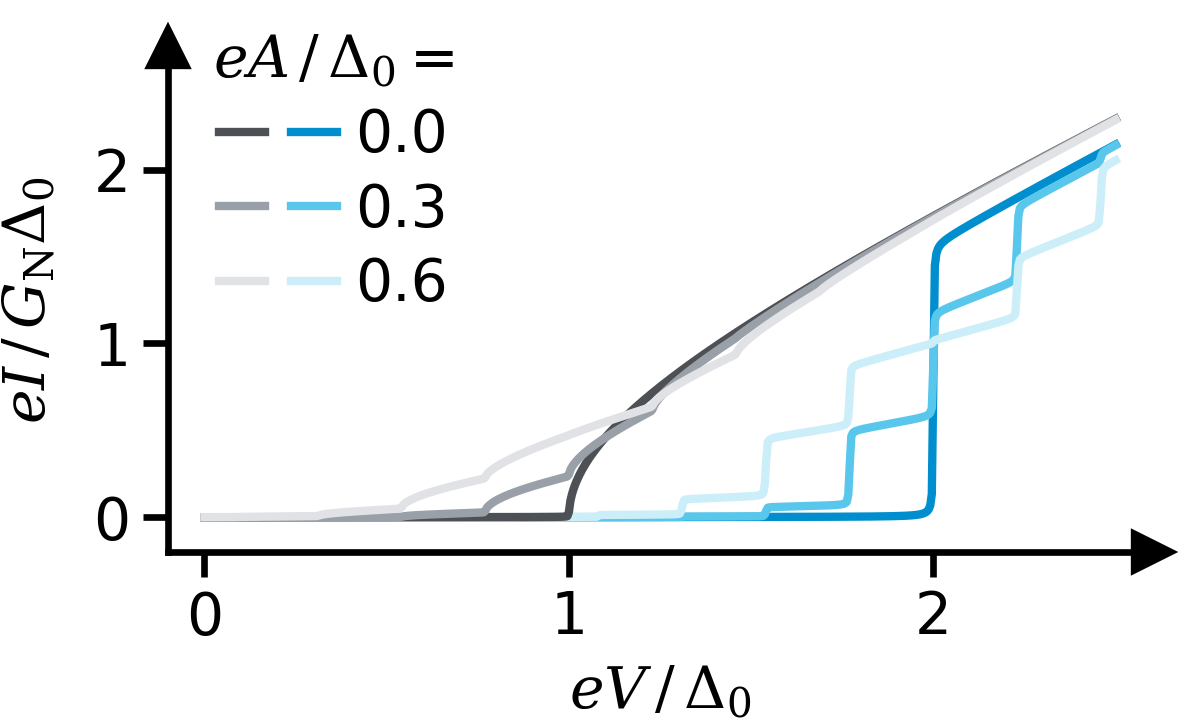

In [16]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

for i, A in enumerate(A_mV):
    # NS
    ax.plot(
        V_mV / Delta_meV,
        I_NS[i, :],
        color=seegrau[2 * i],
        zorder=i + 10,
        label="$\\,$",
    )

for i, A in enumerate(A_mV):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_SS[i, :],
        color=seeblau[2 * i],
        zorder=i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=0.8,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=0.1,
    borderpad=0.1,  # reduces padding inside the legend box
    labelspacing=0.3,  # reduces vertical spacing between items
    handletextpad=0.3,  # reduces spacing between line and label
    bbox_to_anchor=(0.01, 1.1),
)

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "$eI\\,/\\,G_\\mathrm{N}\\Delta_0$"
title = "theory/micro/pat-iv"

theory_layout(fig, ax, title, xlabel, ylabel)

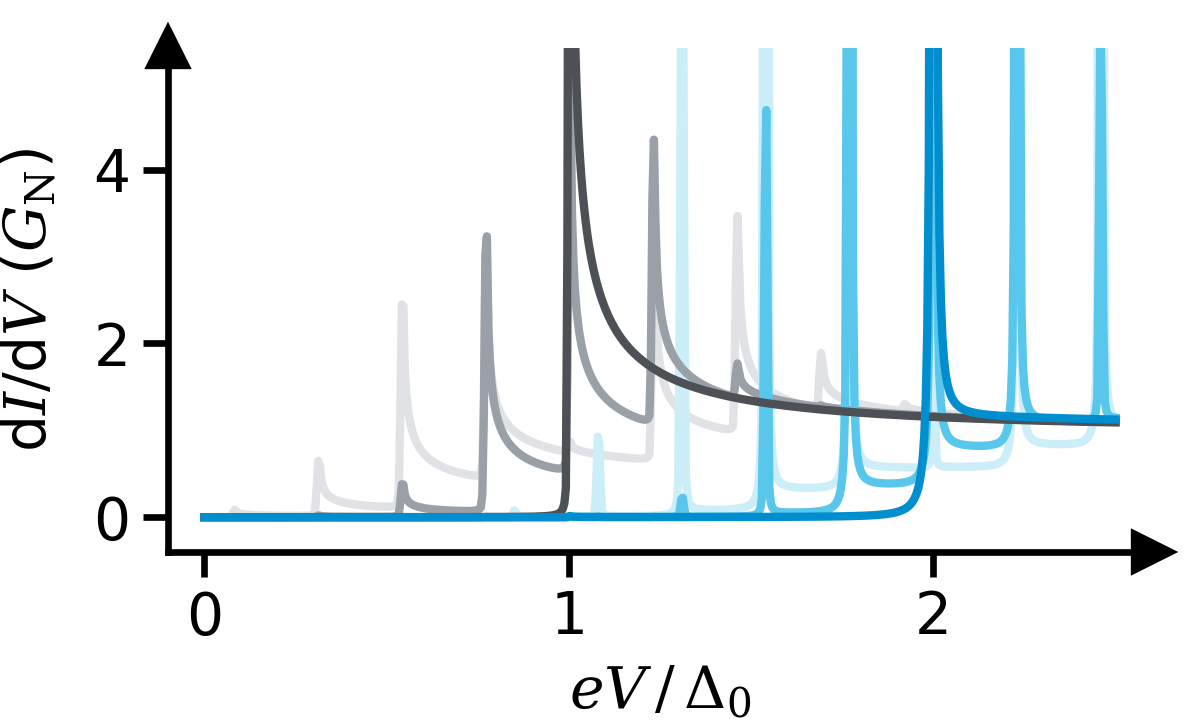

In [17]:
fig, ax = get_figure(figsize=(2.0, 1.2), subfigure=True)

for i, A in enumerate(A_mV):
    ax.plot(
        V_mV / Delta_meV,
        dIdV_NS[i, :],
        color=seegrau[2 * i],
        zorder=10 - i,
    )
    ax.plot(
        V_mV / Delta_meV,
        dIdV_SS[i, :],
        color=seeblau[2 * i],
        zorder=10 - i,
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

xlabel = "$eV\\,/\\,\\Delta_0$"
ylabel = "d$I/$d$V$ ($G_\\mathrm{N}$)"
title = "theory/micro/pat-didv"

theory_layout(fig, ax, title, xlabel, ylabel)